In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data= pd.read_csv('polynomial_data.csv')

In [4]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country manager,5,110000
5,Region manager,6,150000
6,Partner,7,200000
7,Senior partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
x= data[['Level']]
y= data[['Salary']]

In [6]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [7]:
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


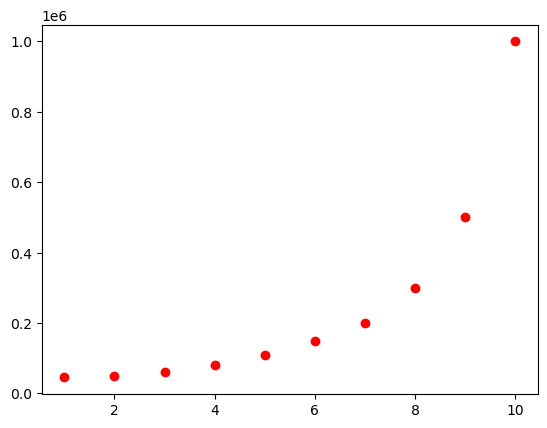

In [8]:
plt.scatter(x,y,color='red')

In [11]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.3,random_state=3)

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [14]:
lr.predict([[6]])

C:\Users\sc024\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[312142.85714286]])

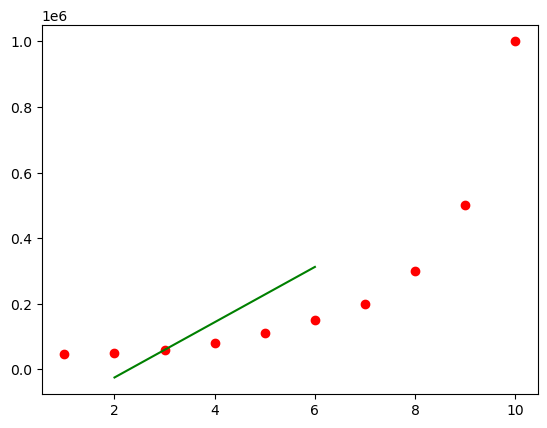

In [16]:
plt.scatter(x,y,color='red')
plt.plot(xtest,lr.predict(xtest),color='g')

In [17]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=3)

In [18]:
poly =PolynomialFeatures(degree=3)

In [19]:
xtrain_polys =poly.fit_transform(x_train)
xtest_polys =poly.fit_transform(x_test)

In [20]:
x1=xtrain
x1
xfinal=xtrain_polys
print(xfinal)
xftest=xtest_polys
print(xftest)
print(xtest)

[[   1.    3.    9.   27.]
 [   1.   10.  100. 1000.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    1.    1.    1.]
 [   1.    4.   16.   64.]
 [   1.    9.   81.  729.]]
[[  1.   6.  36. 216.]
 [  1.   5.  25. 125.]
 [  1.   2.   4.   8.]]
   Level
5      6
4      5
1      2


In [21]:
lr1 = LinearRegression()

In [24]:
lr1.fit(xfinal,ytrain)

LinearRegression()

In [25]:
ypred =lr1.predict(poly.fit_transform([[7]]))
ypred

array([[150647.30517116]])

Text(0, 0.5, 'Salary')

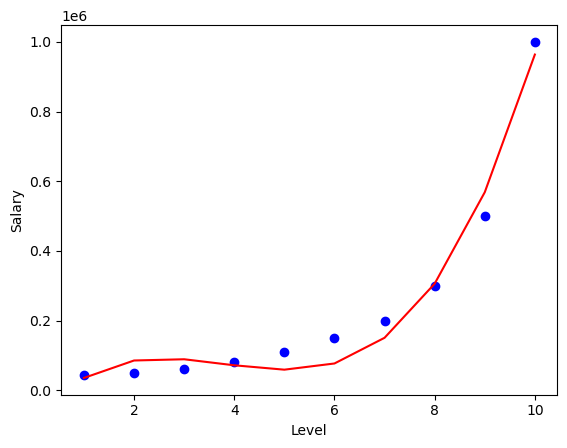

In [27]:
plt.scatter(x,y,color='b')
plt.plot(x,lr1.predict(poly.fit_transform(x)),color='r')
plt.xlabel('Level')
plt.ylabel('Salary')